Training:   0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 0s 379ms/step
Mean Squared Error: 1.3672193389733478e-05


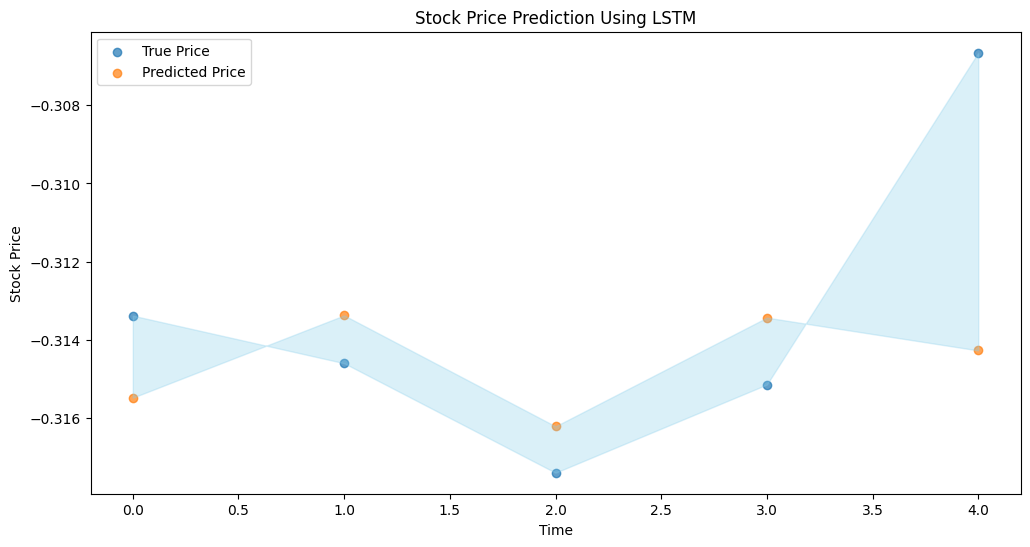

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tqdm.notebook import tqdm

# Load the historical stock data
stock_data = pd.read_csv('company_stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data = stock_data[['Close']]

# Normalize the data with RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(stock_data)

# Define function to create sequences with shifted label
def create_sequences(data, seq_length):
    sequences = []
    target = []

    for i in range(len(data)-seq_length-1):
        seq = data[i:i+seq_length]
        label = data[i+seq_length+1]  # Shifted by 1
        sequences.append(seq)
        target.append(label)

    return np.array(sequences), np.array(target)

# Create sequences and split data with a different sequence length
sequence_length = 20  # Different sequence length
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train LSTM model with different architecture
model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(units=64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Use tqdm for a progress bar during training
for epoch in tqdm(range(50), desc="Training"):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)

# Predict stock prices with different visualization
predictions = model.predict(X_test)
predictions = robust_scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = robust_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize Predictions with a different plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='True Price', alpha=0.7)
plt.scatter(range(len(predictions)), predictions, label='Predicted Price', alpha=0.7)
plt.fill_between(range(len(predictions)), predictions.flatten(), y_test.flatten(), color='skyblue', alpha=0.3)
plt.title('Stock Price Prediction Using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
